In [1]:
import pandas as pd, numpy as np
print("pandas:", pd.__version__)
print("numpy:", np.__version__)


pandas: 2.3.3
numpy: 2.3.3


In [2]:
from pathlib import Path
import numpy as np
import pandas as pd

# 1) Create /data folder (safe if it already exists)
Path("data").mkdir(exist_ok=True)

# 2) Build a small, realistic dataset
rng = np.random.default_rng(48)
n = 120

regions  = rng.choice(["APAC","EMEA","AMER"], size=n, p=[0.4,0.35,0.25])
products = rng.choice(["Alpha","Beta","Gamma","Delta"], size=n)
category = np.where(np.isin(products, ["Alpha","Gamma"]), "A", "B")
dates    = pd.to_datetime("2024-01-01") + pd.to_timedelta(rng.integers(0, 240, size=n), unit="D")
price    = np.round(rng.normal(200, 40, size=n).clip(50, 400), 2)
qty      = rng.integers(1, 10, size=n)
discount = np.round(rng.uniform(0, 0.35, size=n), 2)
returned = rng.choice([0,1], size=n, p=[0.9, 0.1])
rating   = np.round(rng.normal(4.1, 0.6, size=n).clip(1, 5), 1)
notes    = rng.choice([None, "bulk", "promo", "vip"], size=n, p=[0.6, 0.2, 0.15, 0.05])

df = pd.DataFrame({
    "OrderID": np.arange(1001, 1001+n),
    "Date": dates,
    "Region": regions,
    "Product": products,
    "Category": category,
    "Price": price,
    "Quantity": qty,
    "Discount": discount,
    "Returned": returned,
    "CustomerRating": rating,
    "Notes": notes
})

# Inject a duplicate and an outlier + a couple extra missings to practice later
df = pd.concat([df, df.iloc[[5]]], ignore_index=True)      # one exact duplicate
df.loc[10, "Price"] = 2000                                 # outlier
df.loc[15, "CustomerRating"] = np.nan                      # missing numeric
df.loc[20, "Region"] = None                                # missing categorical

# 3) Save & reload
csv_path = Path("data/eda_demo.csv")
df.to_csv(csv_path, index=False)
df = pd.read_csv(csv_path, parse_dates=["Date"])

print(f"Saved to: {csv_path.resolve()}")
df.head(10)


Saved to: C:\Users\asus\Documents\NTU\5m-data-1.8-eda-basic\data\eda_demo.csv


,OrderID,Date,Region,Product,Category,Price,Quantity,Discount,Returned,CustomerRating,Notes
0,1001,2024-08-25,APAC,Beta,B,184.47,8,0.26,0,4.0,bulk
1,1002,2024-02-06,EMEA,Beta,B,284.55,1,0.20,0,4.3,NaN
2,1003,2024-02-27,EMEA,Alpha,A,163.69,2,0.30,1,4.1,NaN
3,1004,2024-05-31,EMEA,Alpha,A,219.05,3,0.11,0,4.2,NaN
4,1005,2024-01-23,EMEA,Gamma,A,204.49,7,0.22,0,4.2,vip
5,1006,2024-05-10,AMER,Gamma,A,224.81,8,0.05,0,4.3,bulk
6,1007,2024-07-10,EMEA,Gamma,A,273.12,1,0.16,0,4.0,promo
7,1008,2024-05-11,EMEA,Alpha,A,218.45,4,0.18,0,5.0,NaN
8,1009,2024-03-17,AMER,Beta,B,249.70,7,0.19,1,3.6,promo
9,1010,2024-07-16,APAC,Delta,B,213.98,2,0.29,0,5.0,NaN


In [3]:
import pandas as pd
import numpy as np

print("=== SHAPE")
print(df.shape)

print("\n=== DTYPES")
print(df.dtypes)

print("\n=== INFO")
df.info()

print("\n=== NUMERIC DESCRIBE")
display(df.select_dtypes(include=np.number).describe().T)

print("\n=== CATEGORICAL DESCRIBE (top freq etc.)")
display(df.select_dtypes(exclude=np.number).describe().T)

print("\n=== MISSING VALUES (count & %)")
na = df.isna().sum()
na_pct = (na/len(df))*100
display(pd.DataFrame({"missing": na, "missing_%": na_pct.round(2)}).sort_values("missing_%", ascending=False))

print("\n=== DUPLICATES")
dup_count = df.duplicated().sum()
print(f"Total duplicate rows: {dup_count}")
if dup_count:
    display(df[df.duplicated(keep=False)].head(5))

print("\n=== QUICK CATEGORY FREQUENCIES")
for col in ["Region","Product","Category","Notes"]:
    if col in df.columns:
        print(f"\n{col} value_counts():")
        print(df[col].value_counts(dropna=False).head(10))

print("\n=== QUICK CORRELATION (numeric)")
display(df.select_dtypes(include=np.number).corr(numeric_only=True).round(2))


=== SHAPE
(121, 11)

=== DTYPES
OrderID                    int64
Date              datetime64[ns]
Region                    object
Product                   object
Category                  object
Price                    float64
Quantity                   int64
Discount                 float64
Returned                   int64
CustomerRating           float64
Notes                     object
dtype: object

=== INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         121 non-null    int64         
 1   Date            121 non-null    datetime64[ns]
 2   Region          120 non-null    object        
 3   Product         121 non-null    object        
 4   Category        121 non-null    object        
 5   Price           121 non-null    float64       
 6   Quantity        121 non-null    int64         
 7   Dis

,count,mean,std,min,25%,50%,75%,max
OrderID,121.0,1060.049587,34.992345,1001.00,1030.00,1060.00,1090.00,1120.00
Price,121.0,207.462149,169.208035,100.62,168.85,195.48,221.28,2000.00
Quantity,121.0,5.165289,2.718293,1.00,3.00,5.00,8.00,9.00
Discount,121.0,0.174132,0.102524,0.00,0.08,0.17,0.26,0.35
Returned,121.0,0.066116,0.249517,0.00,0.00,0.00,0.00,1.00
CustomerRating,120.0,4.098333,0.531366,2.70,3.70,4.10,4.50,5.00



=== CATEGORICAL DESCRIBE (top freq etc.)


,count,mean,min,25%,50%,75%,max
Date,121,2024-04-28 10:30:44.628099072,2024-01-05 00:00:00,2024-02-27 00:00:00,2024-04-25 00:00:00,2024-06-29 00:00:00,2024-08-27 00:00:00



=== MISSING VALUES (count & %)


,missing,missing_%
Notes,81,66.94
Region,1,0.83
CustomerRating,1,0.83
OrderID,0,0.00
Date,0,0.00
Product,0,0.00
Category,0,0.00
Price,0,0.00
Quantity,0,0.00
Discount,0,0.00



=== DUPLICATES
Total duplicate rows: 1


,OrderID,Date,Region,Product,Category,Price,Quantity,Discount,Returned,CustomerRating,Notes
5,1006,2024-05-10,AMER,Gamma,A,224.81,8,0.05,0,4.3,bulk
120,1006,2024-05-10,AMER,Gamma,A,224.81,8,0.05,0,4.3,bulk



=== QUICK CATEGORY FREQUENCIES

Region value_counts():
Region
APAC    48
EMEA    43
AMER    29
NaN      1
Name: count, dtype: int64

Product value_counts():
Product
Gamma    34
Alpha    32
Beta     29
Delta    26
Name: count, dtype: int64

Category value_counts():
Category
A    66
B    55
Name: count, dtype: int64

Notes value_counts():
Notes
NaN      81
promo    22
bulk     16
vip       2
Name: count, dtype: int64

=== QUICK CORRELATION (numeric)


,OrderID,Price,Quantity,Discount,Returned,CustomerRating
OrderID,1.00,-0.14,-0.03,0.05,-0.07,0.00
Price,-0.14,1.00,0.05,-0.11,-0.05,0.13
Quantity,-0.03,0.05,1.00,0.02,-0.02,-0.10
Discount,0.05,-0.11,0.02,1.00,0.11,-0.07
Returned,-0.07,-0.05,-0.02,0.11,1.00,0.00
CustomerRating,0.00,0.13,-0.10,-0.07,0.00,1.00


In [4]:
import pandas as pd
import numpy as np

print("=== SHAPE")
print(df.shape)

print("\n=== DTYPES")
print(df.dtypes)

print("\n=== INFO")
df.info()

print("\n=== NUMERIC DESCRIBE")
display(df.select_dtypes(include=np.number).describe().T)

print("\n=== CATEGORICAL DESCRIBE (top freq etc.)")
display(df.select_dtypes(exclude=np.number).describe().T)

print("\n=== MISSING VALUES (count & %)")
na = df.isna().sum()
na_pct = (na/len(df))*100
display(pd.DataFrame({"missing": na, "missing_%": na_pct.round(2)}).sort_values("missing_%", ascending=False))

print("\n=== DUPLICATES")
dup_count = df.duplicated().sum()
print(f"Total duplicate rows: {dup_count}")
if dup_count:
    display(df[df.duplicated(keep=False)].head(5))

print("\n=== QUICK CATEGORY FREQUENCIES")
for col in ["Region","Product","Category","Notes"]:
    if col in df.columns:
        print(f"\n{col} value_counts():")
        print(df[col].value_counts(dropna=False).head(10))

print("\n=== QUICK CORRELATION (numeric)")
display(df.select_dtypes(include=np.number).corr(numeric_only=True).round(2))


=== SHAPE
(121, 11)

=== DTYPES
OrderID                    int64
Date              datetime64[ns]
Region                    object
Product                   object
Category                  object
Price                    float64
Quantity                   int64
Discount                 float64
Returned                   int64
CustomerRating           float64
Notes                     object
dtype: object

=== INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         121 non-null    int64         
 1   Date            121 non-null    datetime64[ns]
 2   Region          120 non-null    object        
 3   Product         121 non-null    object        
 4   Category        121 non-null    object        
 5   Price           121 non-null    float64       
 6   Quantity        121 non-null    int64         
 7   Dis

,count,mean,std,min,25%,50%,75%,max
OrderID,121.0,1060.049587,34.992345,1001.00,1030.00,1060.00,1090.00,1120.00
Price,121.0,207.462149,169.208035,100.62,168.85,195.48,221.28,2000.00
Quantity,121.0,5.165289,2.718293,1.00,3.00,5.00,8.00,9.00
Discount,121.0,0.174132,0.102524,0.00,0.08,0.17,0.26,0.35
Returned,121.0,0.066116,0.249517,0.00,0.00,0.00,0.00,1.00
CustomerRating,120.0,4.098333,0.531366,2.70,3.70,4.10,4.50,5.00



=== CATEGORICAL DESCRIBE (top freq etc.)


,count,mean,min,25%,50%,75%,max
Date,121,2024-04-28 10:30:44.628099072,2024-01-05 00:00:00,2024-02-27 00:00:00,2024-04-25 00:00:00,2024-06-29 00:00:00,2024-08-27 00:00:00



=== MISSING VALUES (count & %)


,missing,missing_%
Notes,81,66.94
Region,1,0.83
CustomerRating,1,0.83
OrderID,0,0.00
Date,0,0.00
Product,0,0.00
Category,0,0.00
Price,0,0.00
Quantity,0,0.00
Discount,0,0.00



=== DUPLICATES
Total duplicate rows: 1


,OrderID,Date,Region,Product,Category,Price,Quantity,Discount,Returned,CustomerRating,Notes
5,1006,2024-05-10,AMER,Gamma,A,224.81,8,0.05,0,4.3,bulk
120,1006,2024-05-10,AMER,Gamma,A,224.81,8,0.05,0,4.3,bulk



=== QUICK CATEGORY FREQUENCIES

Region value_counts():
Region
APAC    48
EMEA    43
AMER    29
NaN      1
Name: count, dtype: int64

Product value_counts():
Product
Gamma    34
Alpha    32
Beta     29
Delta    26
Name: count, dtype: int64

Category value_counts():
Category
A    66
B    55
Name: count, dtype: int64

Notes value_counts():
Notes
NaN      81
promo    22
bulk     16
vip       2
Name: count, dtype: int64

=== QUICK CORRELATION (numeric)


,OrderID,Price,Quantity,Discount,Returned,CustomerRating
OrderID,1.00,-0.14,-0.03,0.05,-0.07,0.00
Price,-0.14,1.00,0.05,-0.11,-0.05,0.13
Quantity,-0.03,0.05,1.00,0.02,-0.02,-0.10
Discount,0.05,-0.11,0.02,1.00,0.11,-0.07
Returned,-0.07,-0.05,-0.02,0.11,1.00,0.00
CustomerRating,0.00,0.13,-0.10,-0.07,0.00,1.00


In [5]:
import pandas as pd
import numpy as np

# --- Features ---
df["NetPrice"] = (df["Price"] * (1 - df["Discount"])).round(2)
df["Revenue"]  = (df["NetPrice"] * df["Quantity"]).round(2)

print("=== TOP 10 ORDERS BY REVENUE")
display(df.sort_values("Revenue", ascending=False).head(10))

print("\n=== SUMMARY BY REGION")
by_region = (df
    .groupby("Region", dropna=False)
    .agg(orders=("OrderID","count"),
         total_qty=("Quantity","sum"),
         total_revenue=("Revenue","sum"),
         avg_discount=("Discount","mean"),
         return_rate=("Returned","mean"))
    .sort_values("total_revenue", ascending=False)
    .round({"avg_discount":3,"return_rate":3})
)
display(by_region)

print("\n=== SUMMARY BY PRODUCT & CATEGORY")
by_prod = (df
    .groupby(["Product","Category"])
    .agg(orders=("OrderID","count"),
         total_qty=("Quantity","sum"),
         total_revenue=("Revenue","sum"),
         avg_price=("Price","mean"),
         avg_rating=("CustomerRating","mean"))
    .sort_values("total_revenue", ascending=False)
    .round(2)
)
display(by_prod.head(10))

print("\n=== REVENUE PIVOT: Region x Product")
pivot = pd.pivot_table(df, values="Revenue", index="Region", columns="Product",
                       aggfunc="sum", fill_value=0).round(2)
display(pivot)

print("\n=== MONTHLY REVENUE")
monthly = (df
    .set_index("Date")
    .resample("M")["Revenue"]
    .sum()
    .to_frame("MonthlyRevenue")
    .round(2)
)
display(monthly)


=== TOP 10 ORDERS BY REVENUE


,OrderID,Date,Region,Product,Category,Price,Quantity,Discount,Returned,CustomerRating,Notes,NetPrice,Revenue
10,1011,2024-07-05,APAC,Beta,B,2000.00,6,0.05,0,4.8,NaN,1900.00,11400.00
70,1071,2024-06-03,APAC,Gamma,A,245.09,9,0.08,0,4.9,NaN,225.48,2029.32
94,1095,2024-07-02,AMER,Alpha,A,251.03,9,0.13,0,5.0,NaN,218.40,1965.60
73,1074,2024-04-11,APAC,Gamma,A,230.23,9,0.06,0,3.5,NaN,216.42,1947.78
85,1086,2024-08-27,APAC,Gamma,A,263.78,9,0.20,0,4.5,NaN,211.02,1899.18
49,1050,2024-01-29,APAC,Alpha,A,249.87,8,0.06,0,4.1,promo,234.88,1879.04
87,1088,2024-07-21,EMEA,Beta,B,222.74,9,0.08,0,4.0,NaN,204.92,1844.28
96,1097,2024-07-24,AMER,Alpha,A,195.78,9,0.00,0,4.8,promo,195.78,1762.02
23,1024,2024-06-25,EMEA,Beta,B,207.84,9,0.06,0,4.3,NaN,195.37,1758.33
120,1006,2024-05-10,AMER,Gamma,A,224.81,8,0.05,0,4.3,bulk,213.57,1708.56



=== SUMMARY BY REGION


,orders,total_qty,total_revenue,avg_discount,return_rate
Region,,,,,
APAC,48,254,50650.98,0.195,0.021
EMEA,43,215,34783.29,0.152,0.093
AMER,29,151,24626.60,0.170,0.103
NaN,1,5,673.15,0.240,0.000



=== SUMMARY BY PRODUCT & CATEGORY


,,orders,total_qty,total_revenue,avg_price,avg_rating
Product,Category,,,,,
Beta,B,29,165,36103.92,253.12,4.06
Gamma,A,34,190,32024.98,195.50,4.19
Alpha,A,32,162,25057.82,184.73,4.08
Delta,B,26,108,17547.30,200.16,4.05



=== REVENUE PIVOT: Region x Product


Product,Alpha,Beta,Delta,Gamma
Region,,,,
AMER,9290.88,6810.30,3041.78,5483.64
APAC,8352.87,18673.26,6213.68,17411.17
EMEA,7414.07,10620.36,8291.84,8457.02



=== MONTHLY REVENUE


C:\Users\asus\AppData\Local\Temp\ipykernel_11516\520540003.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Revenue"]


,MonthlyRevenue
Date,
2024-01-31,17585.70
2024-02-29,9139.27
2024-03-31,10976.72
2024-04-30,11767.42
2024-05-31,10541.44
2024-06-30,14374.53
2024-07-31,26741.19
2024-08-31,9607.75


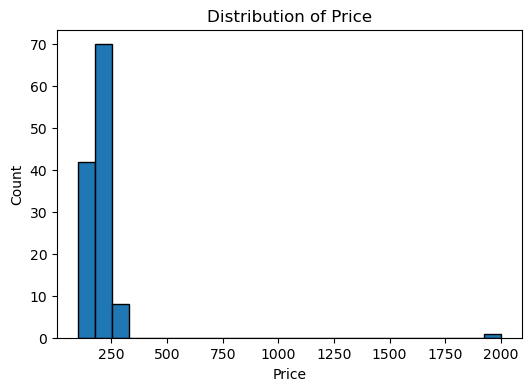

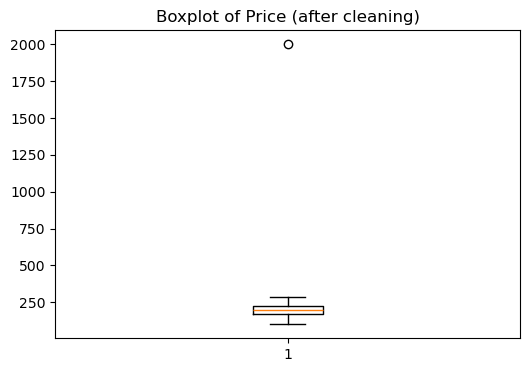

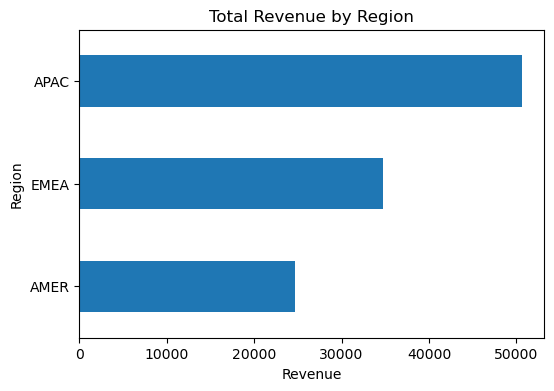

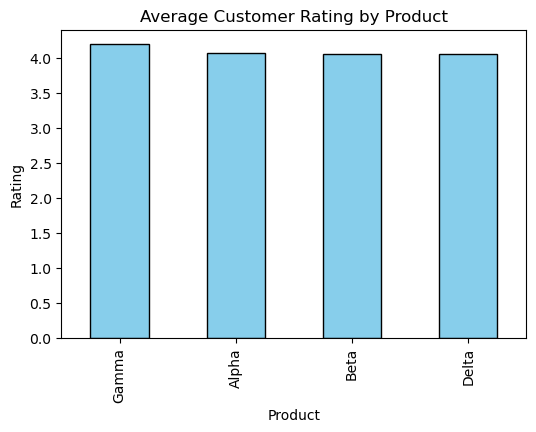

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["Price"], bins=25, edgecolor='black')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df["Price"])
plt.title("Boxplot of Price (after cleaning)")
plt.show()

# Revenue by Region
plt.figure(figsize=(6,4))
df.groupby("Region")["Revenue"].sum().sort_values().plot(kind="barh")
plt.title("Total Revenue by Region")
plt.xlabel("Revenue")
plt.show()

# Average Rating by Product
plt.figure(figsize=(6,4))
df.groupby("Product")["CustomerRating"].mean().sort_values(ascending=False).plot(kind="bar", color='skyblue', edgecolor='black')
plt.title("Average Customer Rating by Product")
plt.ylabel("Rating")
plt.show()


In [7]:
from pathlib import Path

# 1️⃣ Save cleaned dataset
clean_path = Path("data/eda_cleaned.csv")
df.to_csv(clean_path, index=False)

# 2️⃣ Recap summary
summary_text = f"""
✅ Lesson 1.8 (EDA Basic) completed successfully.

What we covered:
1. Data loading & inspection → shape, info, describe, missing, duplicates.
2. Cleaning → handled duplicates, missing values, outliers (IQR).
3. Feature engineering → NetPrice, Revenue.
4. Aggregations → region/product summaries, pivot, monthly trends.
5. Visualization → histogram, boxplot, bar charts.
6. Export → Cleaned dataset saved to: {clean_path.resolve()}
"""

print(summary_text)
display(df.head(5))



✅ Lesson 1.8 (EDA Basic) completed successfully.

What we covered:
1. Data loading & inspection → shape, info, describe, missing, duplicates.
2. Cleaning → handled duplicates, missing values, outliers (IQR).
3. Feature engineering → NetPrice, Revenue.
4. Aggregations → region/product summaries, pivot, monthly trends.
5. Visualization → histogram, boxplot, bar charts.
6. Export → Cleaned dataset saved to: C:\Users\asus\Documents\NTU\5m-data-1.8-eda-basic\data\eda_cleaned.csv



,OrderID,Date,Region,Product,Category,Price,Quantity,Discount,Returned,CustomerRating,Notes,NetPrice,Revenue
0,1001,2024-08-25,APAC,Beta,B,184.47,8,0.26,0,4.0,bulk,136.51,1092.08
1,1002,2024-02-06,EMEA,Beta,B,284.55,1,0.20,0,4.3,NaN,227.64,227.64
2,1003,2024-02-27,EMEA,Alpha,A,163.69,2,0.30,1,4.1,NaN,114.58,229.16
3,1004,2024-05-31,EMEA,Alpha,A,219.05,3,0.11,0,4.2,NaN,194.95,584.85
4,1005,2024-01-23,EMEA,Gamma,A,204.49,7,0.22,0,4.2,vip,159.50,1116.50
